###### Introduction to Network Analysis 2023/24 (vi)

## Link betweenness, node similarity, errors & attacks

### I. Betweenness in transportation networks

You are given two transportation networks in Pajek format.

+ Slovenian highways network from $2010$ ([highways.net](http://lovro.fri.uni-lj.si/ina/nets/highways.net))
+ European highways network from Wikipedia ([euroroads.net](http://lovro.fri.uni-lj.si/ina/nets/euroroads.net))

&nbsp;

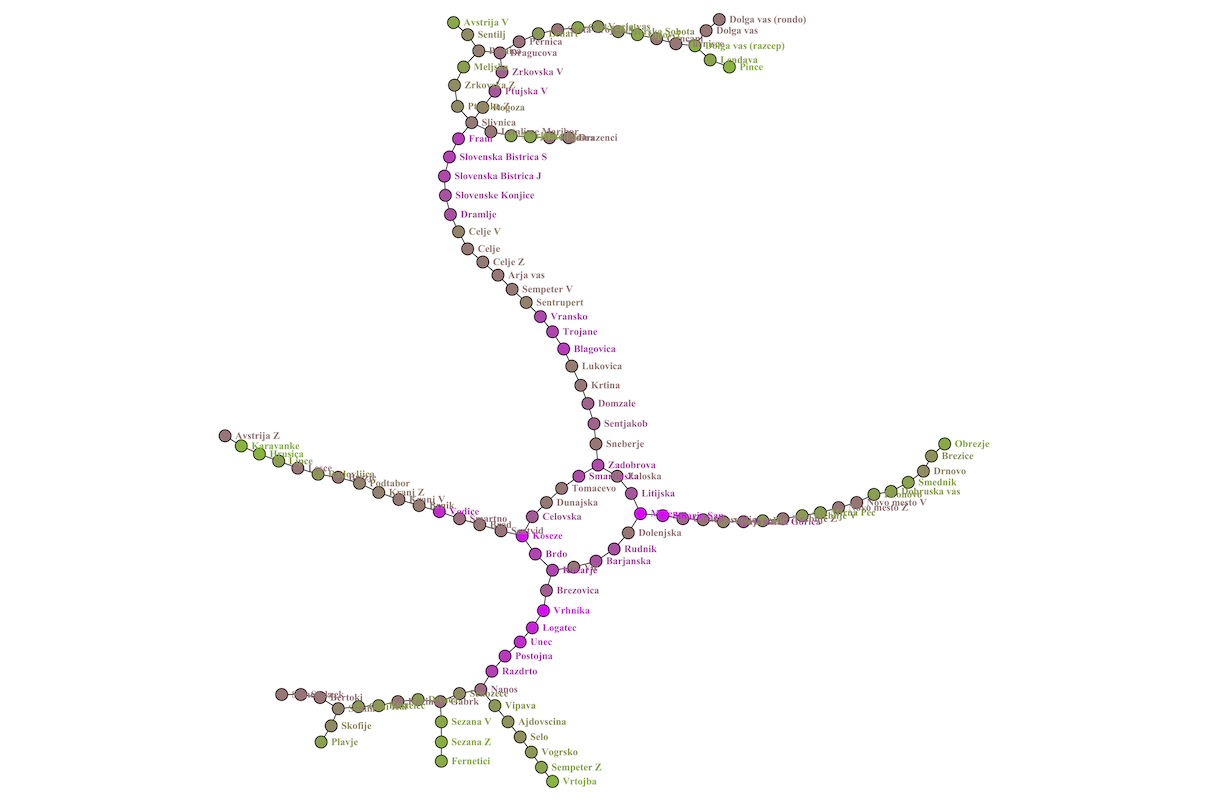



1. **(code)** Compute standard statistics of the networks. Are the results expected?



In [ ]:
import utils

def traffic_parser(label, value):
    return {"label": label, "value": float(value)}

highways = {
    "SLO": utils.read_pajek("highways", label_parser=traffic_parser),
    "EUR": utils.read_pajek("euroroads")
}

for net in highways.values():
    utils.info(net, distance_sample=300)

  MultiGraph | 'highways'
       Nodes | 124 (iso=0)
       Edges | 125 (loop=0)
      Degree | 2.02 (max=4)
         LCC | 100.0% (n=1)
    Distance | 23.09 (max=60)

MultiDiGraph | 'euroroads'
       Nodes | 1,174 (iso=0)
       Edges | 2,834 (loop=0)
      Degree | 2.41 max(in=10, out=10)
         LCC | 88.5% (n=26)
    Distance | 18.52 (max=60)



We can see low clustering and high distances, as expected for a sensibly-planned cross-country road network.
Note that slovenian highways have $m=n+1$, which is 2 more edges than a tree would have ($n - 1$). These 2 extra edges close the loops around Ljubljana and Maribor.
The fact that `euroroads` have a LLC containing only ~90% of nodes is explained by the inclusion of the UK's roads in this data.

2. **(code)** Find the most important highways according to the link betweenness centrality $\sigma_{ij}=\sum_{st\notin\{i,j\}}\frac{g_{st}^{ij}}{g_{st}}$, where $g_{st}$ is the number of geodesic paths between nodes $s$ and $t$, and $g_{st}^{ij}$ is the number of such paths through the link between nodes $i$ and $j$. Which highways have the highest $\sigma_{ij}$?



In [ ]:
import networkx as nx

for loc, hw in highways.items():
    print(loc)
    btwns = {(i,j): c for (i,j,_), c in nx.edge_betweenness_centrality(hw).items()}
    utils.top_edges(hw, btwns, "betweenness")
    print()

SLO
  Centrality | 'betweenness'
    0.481904 | 'Sneberje' - 'Zadobrova'(27,233)
    0.478363 | 'Šentjakob' - 'Sneberje'(23,555)
    0.474561 | 'Domžale' - 'Šentjakob'(26,423)
    0.470496 | 'Krtina' - 'Domžale'(23,555)
    0.466168 | 'Lukovica' - 'Krtina'(19,932)
    0.461579 | 'Blagovica' - 'Lukovica'(28,481)
    0.456727 | 'Trojane' - 'Blagovica'(36,925)
    0.451613 | 'Vransko' - 'Trojane'(35,807)
    0.446237 | 'Šentrupert' - 'Vransko'(26,818)
    0.440598 | 'Šempeter V' - 'Šentrupert'(19,387)
    0.434697 | 'Arja vas' - 'Šempeter V'(20,687)
    0.428534 | 'Celje Z' - 'Arja vas'(20,277)
    0.422109 | 'Celje' - 'Celje Z'(19,867)
    0.415421 | 'Celje V' - 'Celje'(18,474)
    0.408471 | 'Dramlje' - 'Celje V'(24,884)


EUR
  Centrality | 'betweenness'
    0.087577 | 'Rennes' - 'Brest'
    0.087577 | 'Brest' - 'Rennes'
    0.087246 | 'Le Mans' - 'Rennes'
    0.087246 | 'Rennes' - 'Le Mans'
    0.085384 | 'Brest' - 'Minsk'
    0.085384 | 'Minsk' - 'Brest'
    0.078568 | 'Smolensk' - '

The 4 most important roads are the first ones leading from the Ljubljana ring toward the northeast. In general, we would expect that many geodesic pahts go through the start of a "branch" of highways, as any path leading to the respective region of Slovenia has to go through there. This effect is especially prominent for longer branches (the north-eastern being the longest).


3. **(homework)** For the Slovenian highways network, compute the Pearson and Spearman correlation coefficients between the highways betweenness centrality $\sigma_{ij}$ and their actual traffic load. (Assume that the traffic load of a highway is the average of the traffic loads of its endpoints.) Is $\sigma_{ij}$ positively correlated with traffic load?

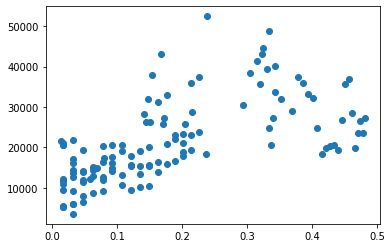

      Person | 0.6254
    Spearman | 0.7138


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

G = highways["SLO"]
C = {(i,j): c for (i,j,_), c in nx.edge_betweenness_centrality(G).items()}
x, y = [], []

for i, j in C:
    x.append(C[(i, j)])
    y.append((G.nodes[i]['value'] + G.nodes[j]['value']) / 2)

plt.scatter(x, y)
plt.show()

print("{:>12s} | {:.4f}".format('Person', pearsonr(x, y)[0]))
print("{:>12s} | {:.4f}".format('Spearman', spearmanr(x, y)[0]))

The correlation *is* positive as expected, however this centrality is only a decent predictor of traffic load for $\sigma_{ij} \leq 0.2$ (as seen in the plot). If we had a very clear correlation for the entire dataset, we could even try to predict these traffic load for european highways with a model trained on Slovenia.